<h3 style="text-align:center">Home Work-3</h3>
<table>
    <thead>
        <th>Name</th>
        <th>Campus Id</th>
    </thead>
    <tbody>
        <tr>
            <td>Hemanth Doddala</td>
            <td>TK76375</td>
        </tr>
    </tbody>
</table>
<ol>
    <li>Create a Spark session</li>
    <li>
        Define the schema for loading the Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)
    </li>
    <li>
        Load the Chicago crime data (you should get more than a million rows).
    </li>
    <li>
        Clean the data:
        <ol>
            <li>
                Remove all null values.
            </li>
            <li>
                Change 'Date' column data type
            </li>
        </ol>
    </li>
    <li>
        Filter the data for last ten years.
    </li>
    <li>
        Remove all the records with the following crime types:
        <ul>
            <li>
                'NON-CRIMINAL (SUBJECT SPECIFIED)'
            </li>
            <li>
                'OTHER OFFENSE'
            </li>
            <li>
                'STALKING'
            </li>
            <li>
                'NON - CRIMINAL'
            </li>
            <li>'
                ARSON'
            </li>
        </ul>
    </li>
    <li>
        Merge the similar crime types.
        <ul>
            <li>
                For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.
            </li>
        </ul>
    </li>
    <li>
        Analyze the data and present results:
        <ol>
            <li>
                Show year-wise trend of the crime for last ten years.
            </li>
            <li>
                Find out at which hour of the day crime is highest.
            </li>
            <li>
                Find top ten crimes and present them as a bar chart.
            </li>
        </ol>
    </li>
</ol>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DateType, BooleanType,TimestampType

<h4>1. Create a Spark session</h4>

In [2]:
spark = SparkSession.builder.getOrCreate()

<h4>
    2. Define the schema for loading the Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)</h4>

In [3]:
schema = StructType([
    StructField('ID', IntegerType(), False),
    StructField('Case Number', StringType(), False),
    StructField('Date', StringType(), False),
    StructField('Block', StringType(), False),
    StructField('IUCR', IntegerType(), False),
    StructField('Primary Type', StringType(), False),
    StructField('Description', StringType(), False),
    StructField('Location Description', StringType(), False),
    StructField('Arrest', BooleanType(), False),
    StructField('Domestic', BooleanType(), False),
    StructField('Beat', IntegerType(), False),
    StructField('District', StringType(), False),
    StructField('Ward', StringType(), False),
    StructField('Community Area', StringType(), False),
    StructField('FBI Code', StringType(), False),
    StructField('X Coordinate', StringType(), False),
    StructField('Y Coordinate', StringType(), False),
    StructField('Year', StringType(), False),
    StructField('Updated On', StringType(), False),
    StructField('Latitude', StringType(), False),
    StructField('Longitude', StringType(), False),
    StructField('Location', StringType(), False),
])

<h4>3. Load the Chicago crime data</h4>

In [4]:
# raw_df=spark.read.option("header",True).csv("Crimes_-_2001_to_Present.csv")
raw_df = spark.read.csv('Crimes_-_2001_to_Present.csv', header=True, nullValue=None, schema=schema)

In [5]:
# Counting Row before dropping NA Values
raw_df.count()

7649542

In [6]:
# Printing Schema of the loaded dataset
raw_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: integer (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



<h4>
   4.Clean the data
</h4>

<h5>4.A Remove all null values</h5>

In [7]:
# Checking Non Values in All Columns
from pyspark.sql.functions import col, when, count
raw_df.select([count(when(col(c).isNotNull() , c)).alias(c) for c in raw_df.columns]
   ).show()

+-------+-----------+-------+-------+-------+------------+-----------+--------------------+-------+--------+-------+--------+-------+--------------+--------+------------+------------+-------+----------+--------+---------+--------+
|     ID|Case Number|   Date|  Block|   IUCR|Primary Type|Description|Location Description| Arrest|Domestic|   Beat|District|   Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|   Year|Updated On|Latitude|Longitude|Location|
+-------+-----------+-------+-------+-------+------------+-----------+--------------------+-------+--------+-------+--------+-------+--------------+--------+------------+------------+-------+----------+--------+---------+--------+
|7649542|    7649538|7649542|7649542|7302676|     7649542|    7649542|             7639880|7649542| 7649542|7649542| 7649495|7034695|       7036066| 7649542|     7568187|     7568187|7649542|   7649542| 7568187|  7568187| 7568187|
+-------+-----------+-------+-------+-------+------------+-----------+------

In [8]:
raw_df = raw_df.na.drop(how="any")

In [9]:
# Row Count after dropping NA Values
raw_df.count()

6632798

<h5>4.B Change 'Date' column data type</h5>

In [10]:
# change Date Column datatype from StringType to TimeStamp type
import pyspark.sql.functions as func
raw_df = raw_df.withColumn('Date', func.to_timestamp('Date', 'dd/MM/yyyy hh:mm:ss a'))

In [11]:
raw_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: integer (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



<li>From the schema which is printed above we can see that Datatype of Date column is changed from StringType to TimeStamp</li>

In [12]:
# Printing head of the dataframe to see type casted date column data.
raw_df.show()

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-05-09 13:30:00|     043XX S WOOD ST| 486|        BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

<h4>5. Filter the data for last ten years.</h4>

In [13]:
filtered_df = raw_df.filter(raw_df["Date"]>='2012-01-01')

In [14]:
filtered_df.show()

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-05-09 13:30:00|     043XX S WOOD ST| 486|        BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [15]:
filtered_df.count()

1053420

<h4>6. Remove all the records with the following crime types:</h4>
    <li>'NON-CRIMINAL (SUBJECT SPECIFIED)'</li>
    <li>'OTHER OFFENSE'</li>
    <li>'STALKING'</li>
    <li>'NON - CRIMINAL'</li>
    <li> ARSON'</li>


In [16]:
# Checking all Distinct or Unique entries in the column before removing
filtered_df.select('Primary Type').distinct().show(100, False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|ARSON                            |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                

In [17]:
filtered_df = filtered_df.filter(
    (filtered_df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)') &
    (filtered_df['Primary Type'] != 'OTHER OFFENSE') & 
    (filtered_df['Primary Type'] != 'STALKING') &
    (filtered_df['Primary Type'] != 'NON-CRIMINAL') & 
    (filtered_df['Primary Type'] != 'NON - CRIMINAL') &
    (filtered_df['Primary Type'] != 'ARSON'))

In [18]:
filtered_df.select('Primary Type').distinct().show(100, False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|KIDNAPPING                       |
|BURGLARY                   

<h4>7. Merge the similar crime types.</h4>
<li>For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'. </li>

In [19]:
filtered_df.withColumn("Primary Type", 
                       when(filtered_df['Primary Type'] == 'PROSTITUTION', 'SEX OFFENSE').\
                       when(filtered_df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT').\
                       when(filtered_df['Primary Type'] == 'OTHER NARCOTIC VIOLATION', 'NARCOTICS').\
                       when(filtered_df['Primary Type'] == 'PUBLIC PEACE VIOLATION', 'PUBLIC INDECENCY').\
                       otherwise(filtered_df['Primary Type']))

DataFrame[ID: int, Case Number: string, Date: timestamp, Block: string, IUCR: int, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [20]:
filtered_df.select('Primary Type').distinct().show(100, False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|KIDNAPPING                       |
|BURGLARY                   

<h4>8. Analyze the data and present results</h4>

<h5>8.A AShow year-wise trend of the crime for last ten years.</h5>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
filtered_df.show()

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-05-09 13:30:00|     043XX S WOOD ST| 486|        BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [23]:
grouped_df = filtered_df.groupBy('Year').count().sort('Year')


Text(0.5, 1.0, 'Year wise Crime Count')

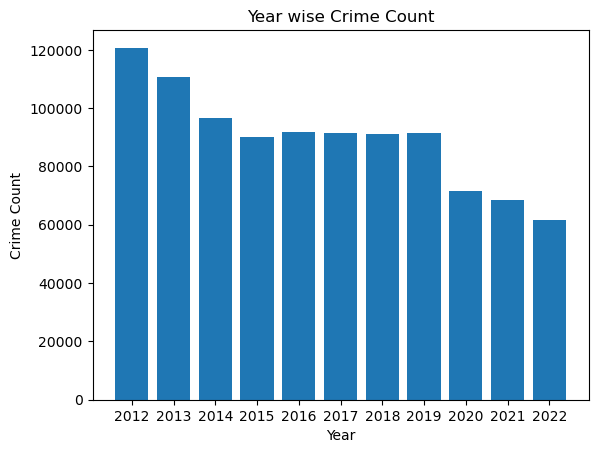

In [24]:
x = grouped_df.toPandas()['Year'].values.tolist()
y = grouped_df.toPandas()['count'].values.tolist()
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Year wise Crime Count')

In [25]:
filtered_df = filtered_df.withColumn("hour", func.hour(col('Date')))

In [26]:
filtered_df.show()

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|hour|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+
|10224738|   HY411648|2015-05-09 13:30:00|     043XX S WOOD ST| 486|        BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| 

<h5>8.B Find out at which hour of the day crime is highest.</h5>

In [27]:
groupedby_hour_df = filtered_df.groupby('hour').count().sort('hour')

In [28]:
groupedby_hour_df.show()

+----+-----+
|hour|count|
+----+-----+
|   0|54348|
|   1|30174|
|   2|25795|
|   3|21679|
|   4|16805|
|   5|14683|
|   6|17216|
|   7|23922|
|   8|34805|
|   9|45875|
|  10|44134|
|  11|45098|
|  12|59078|
|  13|46811|
|  14|49853|
|  15|53531|
|  16|51392|
|  17|52313|
|  18|55177|
|  19|55027|
+----+-----+
only showing top 20 rows



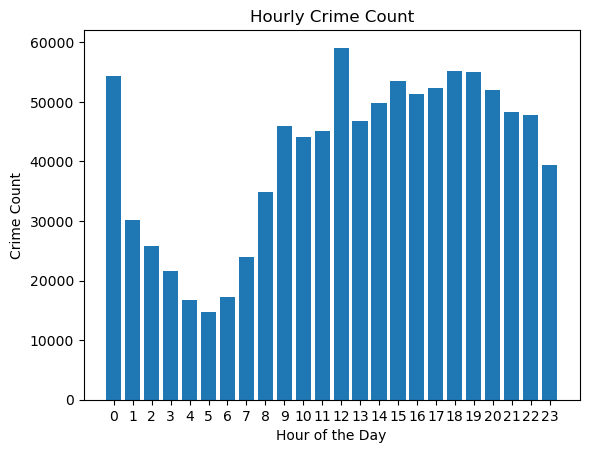

In [29]:
x = groupedby_hour_df.toPandas()['hour'].values.tolist()
y = groupedby_hour_df.toPandas()['count'].values.tolist()
plt.bar(x, y)
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.title('Hourly Crime Count')
plt.xticks(range(24))
plt.show()

<h5>hour of the day with highest crime</h5>

In [30]:
groupedby_hour_df.sort(groupedby_hour_df['count'].desc()).show(1)

+----+-----+
|hour|count|
+----+-----+
|  12|59078|
+----+-----+
only showing top 1 row



<h5>8.C Find top ten crimes and present them as a bar chart.</h5>

In [31]:
groupedby_crime_df = filtered_df.groupby('Primary Type').count()
groupedby_crime_df = groupedby_crime_df.sort(groupedby_crime_df['count'].desc()).limit(10)
groupedby_crime_df.show()

+-------------------+------+
|       Primary Type| count|
+-------------------+------+
|              THEFT|249920|
|            BATTERY|198220|
|    CRIMINAL DAMAGE|120257|
|          NARCOTICS| 76505|
|            ASSAULT| 68937|
| DECEPTIVE PRACTICE| 68806|
|           BURGLARY| 53109|
|MOTOR VEHICLE THEFT| 48802|
|  CRIMINAL TRESPASS| 26944|
|            ROBBERY| 25505|
+-------------------+------+



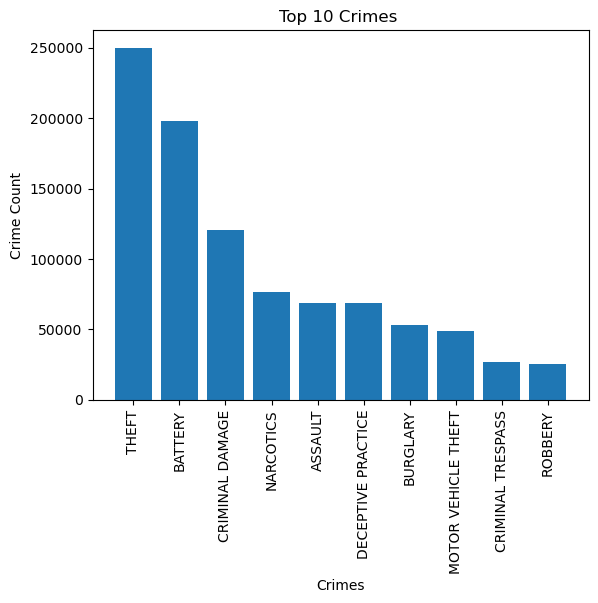

In [32]:
x = groupedby_crime_df.toPandas()['Primary Type'].values.tolist()
y = groupedby_crime_df.toPandas()['count'].values.tolist()
plt.bar(x, y)
plt.xlabel('Crimes')
plt.ylabel('Crime Count')
plt.title('Top 10 Crimes ')
plt.xticks(x, rotation = 90)
plt.show()